In [2]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
import pandas as pd
import api_utils
import app_utils

In [22]:
# setup payload
payload = {'straight': {
                'df': [],
                'runIds': [57, 58, 59],
                'x': 'Time (s)', 
                'y': 'Distance Traveled (m)' ,
                'titles': ['0.25 (m/s) Command for 2 s', '0.5 (m/s) Command for 2 s', '1.0 (m/s) Command for 1 s']
                }, 
            'turn': {
                'df': [],
                'runIds': [60, 61, 62],
                'x': 'Time (s)',
                'y': 'Angle (rads)',
                'titles': ['$\pi/8$ (rad/s) for 2 seconds', '$\pi/2$ (rad/s) for 2 seconds', '$\pi$ (rad/s) for 2 seconds']
                },
            'square': {
                'df': [],
                'runIds': [64],
                'x': 'Time (s)',
                'y': 'Angle (rad)',
                'titles': ['Drive Squre four times']
                }, 
            'slam':{
                'df': [],
                'runIds': [65], 
                'x': 'Time (s)',
                'y': 'Theta (rad)',
                'titles': ['Slam vs. True Pose']
                }
            }


In [23]:
# get all data from the database
for straightRunId, turnRundId in zip(payload['straight']['runIds'], payload['turn']['runIds']):
    # append straight runs
    payload['straight']['df'].append(api_utils.get_df(straightRunId))
    # append turn runs
    payload['turn']['df'].append(api_utils.get_df(turnRundId))

# append square
payload['square']['df'].append(api_utils.get_df(payload['square']['runIds'][0]))

# append slam 
payload['slam']['df'].append(api_utils.get_df(payload['slam']['runIds'][0]))

In [24]:
# example of how to see data
payload['square']['df'][0].keys()

dict_keys(['MBOT_IMU', 'MBOT_ENCODERS', 'ODOMETRY', 'MBOT_STATE', 'MBOT_SETPOINTS', 'SLAM_POSE', 'CONTROLLER_PATH', 'MBOT_MOTOR_COMMAND'])

In [25]:
payload['slam']['df'][0]['TRUE_POSE'].keys()

dict_keys(['timestamp', 'utime', 'x', 'y', 'theta'])

In [26]:
# set plot info for driving straight
plotInfo1 = []
# row 1
plotInfo1 = app_utils.define_plot(plotInfo1, 'ODOMETRY', 'x', 0, '(m)')

# row 2
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'right_velocity', 1, '(m/s)')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'right_velocity', 1, '(m/s)')

# row 3
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'left_velocity', 2, '(m/s)')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'left_velocity', 2, '(m/s)')
plotInfo1

[{'channel': 'ODOMETRY', 'value': 'x', 'row': 0, 'ylabel': '(m)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'}]

In [27]:
# set plot info for turning
plotInfo2 = []

# row 1
plotInfo2 = app_utils.define_plot(plotInfo2, 'ODOMETRY', 'theta', 0, '(rad)')

# row 2
# set points
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'right_velocity', 1, '(rad/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'right_velocity', 1, '(rad/s)')

# row 3
# setpoints
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'left_velocity', 2, '(rad/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'left_velocity', 2, '(rads/s)')
plotInfo2

[{'channel': 'ODOMETRY', 'value': 'theta', 'row': 0, 'ylabel': '(rad)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(rads/s)'}]

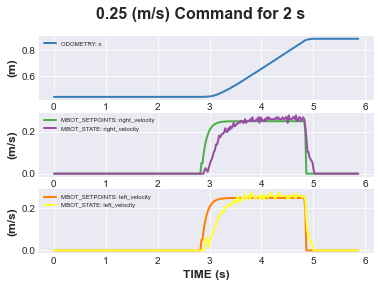

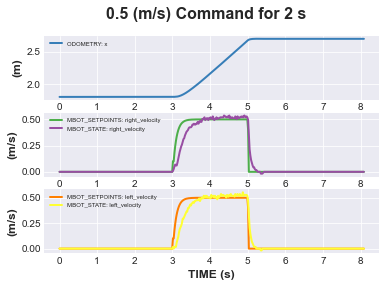

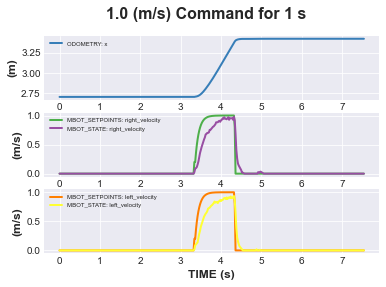

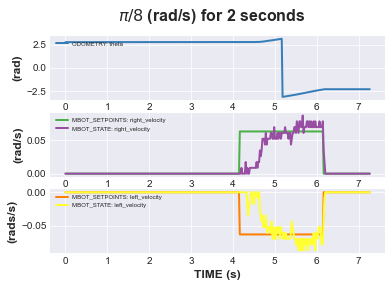

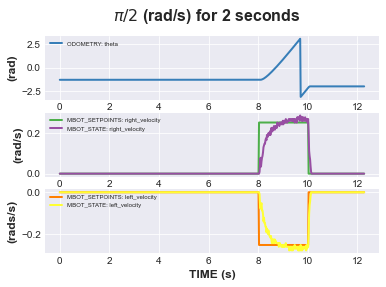

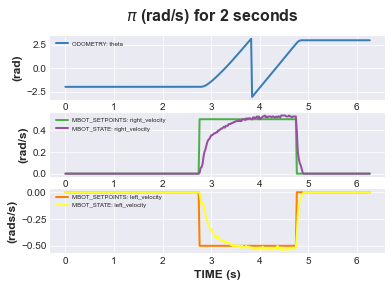

In [28]:
# set run type and run number
runtypes = ['straight', 'turn']
plotInfos = [plotInfo1, plotInfo2]
runs = [0, 1, 2]

# number of rows
rows = 3
# go through each runtype and match plot values
for runtype, plotInfo in zip(runtypes, plotInfos):
    # go through each run
    for run in runs:
        # get df for runtype and run combo
        df = payload[runtype]['df'][run]
        # overall labels
        xlabel = payload[runtype]['x']
        title = payload[runtype]['titles'][run]
        # get figure 
        app_utils.get_plot(df, plotInfo, title, xlabel, rows)


In [29]:
# plot slam pose over time for driving in square
plotInfo3 = []
plotInfo3 = app_utils.define_plot(plotInfo3, 'SLAM_POSE', 'theta', 0, '(rad)')


In [30]:
#  dead reckoning plot
runtype = 'square'
run = 0

# get df for runtype and run combo
df = payload[runtype]['df'][run]
# overall labels
xlabel = payload[runtype]['x']
title = payload[runtype]['titles'][run]



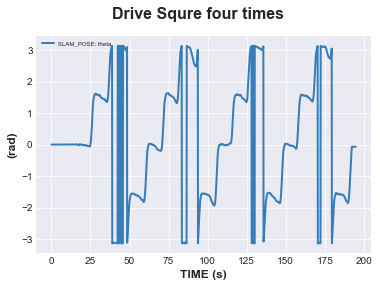

In [31]:
rows = 1
# get figure 
fig = app_utils.get_plot(df, plotInfo3, title, xlabel, rows)



In [32]:
plotInfo4 = []
plotInfo4 = app_utils.define_plot(plotInfo4, 'SLAM_POSE', 'theta', 0, '(rad)')
plotInfo4 = app_utils.define_plot(plotInfo4, 'TRUE_POSE', 'theta', 0, '(rad)')


In [33]:
# true vs. slam pose
runtype = 'slam'
run = 0

# get df for runtype and run combo
df = payload[runtype]['df'][run]

# overall labels
xlabel = payload[runtype]['x']
title = payload[runtype]['titles'][run]

In [34]:
# get slam pose, true pose dataframes
sp = pd.DataFrame(df['SLAM_POSE'])
tp = pd.DataFrame(df['TRUE_POSE'])
od = pd.DataFrame(df['ODOMETRY'])

# trim leading zeros on slam pose df
sp = sp.truncate(before=80)
sp.describe()


,timestamp,utime,x,y,theta
count,3.550000e+02,3.550000e+02,355.000000,355.000000,355.000000
mean,2.429082e+07,1.512689e+15,-0.082052,1.185419,-0.104116
std,7.180783e+06,7.579083e+06,0.938652,0.951319,1.777057
min,1.156251e+07,1.512689e+15,-1.416830,-0.007532,-3.118920
25%,1.774475e+07,1.512689e+15,-1.091662,0.323640,-1.603630
50%,2.389714e+07,1.512689e+15,-0.008099,1.030729,-0.273828
75%,3.052683e+07,1.512689e+15,0.939752,2.068597,1.423855
max,3.669874e+07,1.512689e+15,1.200463,2.596036,3.101927


In [35]:
# merge both dataframes on nearest utime value
combined_df = pd.merge_asof(sp, tp, on='utime', direction='nearest')
combined_df.head()

,timestamp_x,utime,x_x,y_x,theta_x,timestamp_y,x_y,y_y,theta_y
0,11562506,1512688533768807,0.000000,0.000000,0.000000,10533798,0.001920,0.001308,-0.008900
1,11620619,1512688533840394,0.000000,0.000000,0.000000,10722812,0.001902,0.001197,-0.008891
2,11763503,1512688533912600,0.003064,-0.001656,0.000823,10743813,0.001978,0.001211,-0.009195
3,11791283,1512688533983966,0.002600,-0.004185,0.022491,10763851,0.001994,0.001408,-0.008960
4,11943402,1512688534055810,0.003475,-0.003604,0.066797,10928896,0.001924,0.001135,-0.009049


In [36]:
combined_df = pd.merge_asof(combined_df, od, on='utime', direction='nearest')
combined_df.head()


,timestamp_x,utime,x_x,y_x,theta_x,timestamp_y,x_y,y_y,theta_y,timestamp,x,y,theta
0,11562506,1512688533768807,0.000000,0.000000,0.000000,10533798,0.001920,0.001308,-0.008900,11544292,0.000000,0.000000,0.000000
1,11620619,1512688533840394,0.000000,0.000000,0.000000,10722812,0.001902,0.001197,-0.008891,11620506,0.000000,0.000000,0.000000
2,11763503,1512688533912600,0.003064,-0.001656,0.000823,10743813,0.001978,0.001211,-0.009195,11759874,0.000462,0.000013,0.036667
3,11791283,1512688533983966,0.002600,-0.004185,0.022491,10763851,0.001994,0.001408,-0.008960,11790860,0.000615,0.000025,0.079200
4,11943402,1512688534055810,0.003475,-0.003604,0.066797,10928896,0.001924,0.001135,-0.009049,11791161,0.000539,0.000018,0.104866


In [37]:
# shift time and convert to seconds 
combined_df['time'] = combined_df['utime'] - combined_df['utime'][0]
combined_df['time'] = combined_df['time'] * 1e-6
combined_df.head()



,timestamp_x,utime,x_x,y_x,theta_x,timestamp_y,x_y,y_y,theta_y,timestamp,x,y,theta,time
0,11562506,1512688533768807,0.000000,0.000000,0.000000,10533798,0.001920,0.001308,-0.008900,11544292,0.000000,0.000000,0.000000,0.000000
1,11620619,1512688533840394,0.000000,0.000000,0.000000,10722812,0.001902,0.001197,-0.008891,11620506,0.000000,0.000000,0.000000,0.071587
2,11763503,1512688533912600,0.003064,-0.001656,0.000823,10743813,0.001978,0.001211,-0.009195,11759874,0.000462,0.000013,0.036667,0.143793
3,11791283,1512688533983966,0.002600,-0.004185,0.022491,10763851,0.001994,0.001408,-0.008960,11790860,0.000615,0.000025,0.079200,0.215159
4,11943402,1512688534055810,0.003475,-0.003604,0.066797,10928896,0.001924,0.001135,-0.009049,11791161,0.000539,0.000018,0.104866,0.287003


In [38]:
# calculate rms 
rmse = {'x': None, 'y': None, 'theta': None}
rmse['theta'] = mean_squared_error(combined_df.theta_x, combined_df.theta_y, squared=False)
rmse['x'] = mean_squared_error(combined_df.x_x, combined_df.x_y, squared=False)
rmse['y'] = mean_squared_error(combined_df.y_x, combined_df.y_y, squared=False)
rmse



{'x': 0.048292194542271696,
 'y': 0.04038297146569273,
 'theta': 0.07322607869176466}

Text(0, -3, 'RMSE: 0.073')

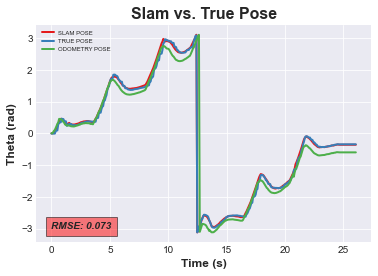

In [39]:
# plot values
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.plot(combined_df.time, combined_df.theta_x, linewidth=2, color= palette(0), label='SLAM POSE')
plt.plot(combined_df.time, combined_df.theta_y, linewidth=2, color= palette(1), label='TRUE POSE')
plt.plot(combined_df.time, combined_df.theta, linewidth=2, color= palette(2), label='ODOMETRY POSE')
plt.legend(loc=2, prop={'size': 6})
plt.xlabel(payload['slam']['x'], fontsize=12, fontweight='bold')
plt.ylabel(payload['slam']['y'], fontsize=12, fontweight='bold')
plt.title(payload['slam']['titles'][0], fontsize=16, fontweight='bold')
value = rmse['theta']
plt.text(0, -3, f'RMSE: {value:.3f}', fontweight='bold', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad': 5})

Text(0.5, 0.98, 'Slam vs. True vs. Odometry')

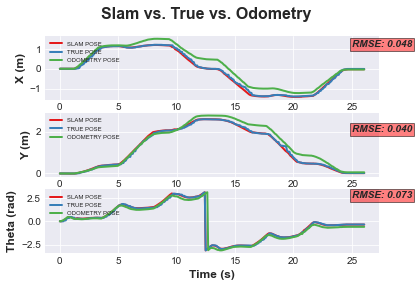

In [40]:
fig, axes = plt.subplots(3,1)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

axes[2].plot(combined_df.time, combined_df.theta_x, linewidth=2, color= palette(0), label='SLAM POSE')
axes[2].plot(combined_df.time, combined_df.theta_y, linewidth=2, color= palette(1), label='TRUE POSE')
axes[2].plot(combined_df.time, combined_df.theta, linewidth=2, color= palette(2), label='ODOMETRY POSE')
axes[2].legend(loc=2, prop={'size': 6})
axes[2].set_ylabel(payload['slam']['y'], fontsize=12, fontweight='bold')
value = rmse['theta']
axes[2].text(25, 2.5, f'RMSE: {value:.3f}', fontweight='bold', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad': 2})


axes[0].plot(combined_df.time, combined_df.x_x, linewidth=2, color= palette(0), label='SLAM POSE')
axes[0].plot(combined_df.time, combined_df.x_y, linewidth=2, color= palette(1), label='TRUE POSE')
axes[0].plot(combined_df.time, combined_df.x, linewidth=2, color= palette(2), label='ODOMETRY POSE')
axes[0].legend(loc=2, prop={'size': 6})
axes[0].set_ylabel('X (m)', fontsize=12, fontweight='bold')
value = rmse['x']
axes[0].text(25, 1.1, f'RMSE: {value:.3f}', fontweight='bold', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad': 2})

axes[1].plot(combined_df.time, combined_df.y_x, linewidth=2, color= palette(0), label='SLAM POSE')
axes[1].plot(combined_df.time, combined_df.y_y, linewidth=2, color= palette(1), label='TRUE POSE')
axes[1].plot(combined_df.time, combined_df.y, linewidth=2, color= palette(2), label='ODOMETRY POSE')
axes[1].legend(loc=2, prop={'size': 6})
axes[1].set_ylabel('Y (m)', fontsize=12, fontweight='bold')
value = rmse['y']
axes[1].text(25, 2.0, f'RMSE: {value:.3f}', fontweight='bold', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad': 2})


axes[2].set_xlabel(payload['slam']['x'], fontsize=12, fontweight='bold')

fig.suptitle('Slam vs. True vs. Odometry', fontsize=16, fontweight='bold')






In [41]:
simple_drive = api_utils.get_df(70)
simple_drive.keys()
simple_drive['MBOT_STATE'].keys()

dict_keys(['timestamp', 'utime', 'fwd_velocity', 'turn_velocity', 'left_velocity', 'right_velocity', 'yaw_delta', 'encoder_yaw_delta'])

In [4]:
plotInfo6 = []

plotInfo6 = []
plotInfo6 = app_utils.define_plot(plotInfo6, 'MBOT_MOTOR_COMMAND', 'trans_v', 0, '(m/s)')
plotInfo6 = app_utils.define_plot(plotInfo6, 'MBOT_STATE', 'fwd_velocity', 0, '(m/s)')

plotInfo6 = app_utils.define_plot(plotInfo6, 'MBOT_MOTOR_COMMAND', 'angular_v', 1, '(rad/s)')
plotInfo6 = app_utils.define_plot(plotInfo6, 'MBOT_STATE', 'turn_velocity', 1, '(rad/s)')




In [43]:
sd_cmd = pd.DataFrame(simple_drive['MBOT_MOTOR_COMMAND'])
sd_state = pd.DataFrame(simple_drive['MBOT_STATE'])

In [44]:
sd_cmd['time'] = sd_cmd['utime'] - sd_cmd['utime'][0]
sd_cmd['time'] = sd_cmd['time'] * 1e-6
sd_cmd['time'][0:1200]

0        0.000000
1        0.018792
2        0.039289
3        0.058707
4        0.079084
          ...    
1195    23.434750
1196    23.454769
1197    23.474790
1198    23.494804
1199    23.514912
Name: time, Length: 1200, dtype: float64

In [45]:
sd_state['time'] = sd_state['utime'] - sd_state['utime'][0]
sd_state['time'] = sd_state['time'] * 1e-6
sd_state['time'][1200]

24.02054

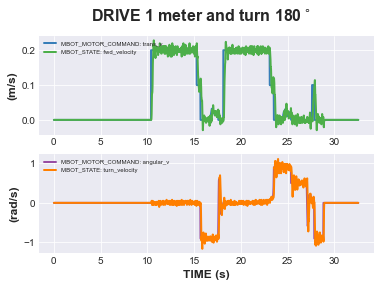

In [46]:
rows = 2
# get figure 


fig = app_utils.get_plot(simple_drive, plotInfo6, 'DRIVE 1 meter and turn 180$^\circ$', 'Time (s)', rows)


Text(0.5, 0.98, 'DRIVE 1 meter and turn 180$^\\circ$')

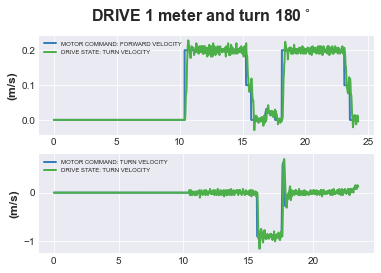

In [47]:
# setup plot
title = 'DRIVE 1 meter and turn 180$^\circ$'
xlabel = 'Time (s)' 

rows = 2 

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
fig, axes = plt.subplots(rows, 1)




axes[0].plot(sd_cmd['time'][0:1210], sd_cmd['trans_v'][0:1210], linewidth=2, color= palette(1), label=f'MOTOR COMMAND: FORWARD VELOCITY')

axes[0].plot(sd_state['time'][0:1210], sd_state['fwd_velocity'][0:1210], linewidth=2, color= palette(2), label=f'DRIVE STATE: TURN VELOCITY')
axes[0].set_ylabel('(m/s)', fontsize=12, fontweight='bold')
axes[0].legend(loc=2, prop={'size': 6})


axes[1].plot(sd_cmd['time'][0:1175], sd_cmd['angular_v'][0:1175], linewidth=2, color= palette(1), label=f'MOTOR COMMAND: TURN VELOCITY')

axes[1].plot(sd_state['time'][0:1175], sd_state['turn_velocity'][0:1175], linewidth=2, color= palette(2), label=f'DRIVE STATE: TURN VELOCITY')
axes[1].set_ylabel('(m/s)', fontsize=12, fontweight='bold')
axes[1].legend(loc=2, prop={'size': 6})




fig.suptitle(title, fontsize=16, fontweight='bold')
